# Load Diabetes Dataset

In [ ]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Diabetes dataset
diabetes = datasets.load_diabetes()

# Convert it into a DataFrame for better readability
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Add the target column (disease progression)
df['disease_progression'] = diabetes.target

# Attributes in the Diabetes dataset:
- age: Age of the patient.
- sex: Gender of the patient.
- bmi: Body mass index (BMI).
- bp: Average blood pressure.
- s1: T-Cells (a type of white blood cell).
- s2: Low-density lipoproteins (LDL).
- s3: High-density lipoproteins (HDL).
- s4: Total cholesterol.
- s5: Serum triglycerides level.
- s6: Blood sugar level.
- In addition to these, the target variable in the dataset represents the disease progression after one year.

In [ ]:
print(df.head(0))

Empty DataFrame
Columns: [age, sex, bmi, bp, s1, s2, s3, s4, s5, s6]
Index: []


# Scatter Plot
## Relation between BMI and diabetes progression

Text(0, 0.5, 'Disease Progression')

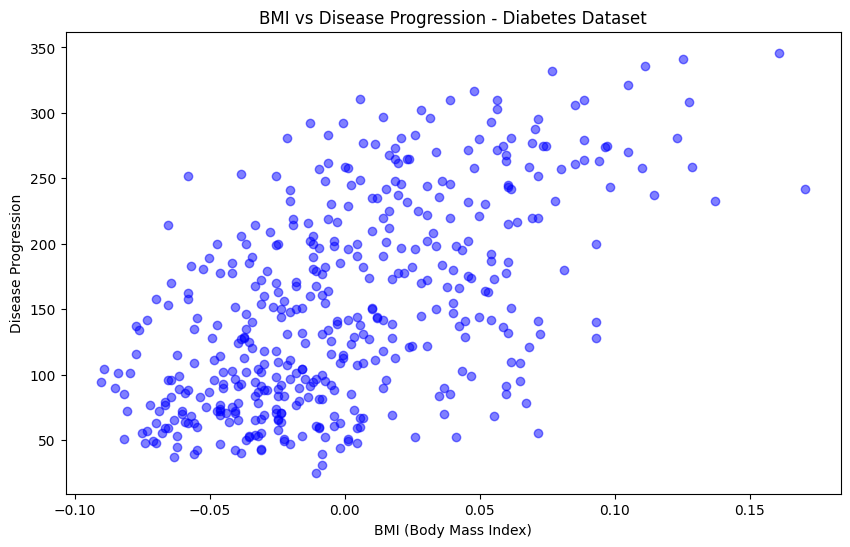

In [ ]:


# Plotting BMI vs Disease Progression
plt.figure(figsize=(10, 6))
plt.scatter(df['bmi'], df['disease_progression'], color='b', alpha=0.5)

# Adding labels and title
plt.title('BMI vs Disease Progression - Diabetes Dataset')
plt.xlabel('BMI (Body Mass Index)')
plt.ylabel('Disease Progression')


There appears to be a positive correlation between BMI and disease progression. As BMI increases, the progression of diabetes (as measured by the target variable) also tends to increase. This suggests that higher BMI is associated with more severe disease progression after a year.

# HeatMap
This graph shows the correlation between every pair of features in the dataset. A value close to 1 indicates a strong positive correlation, while a value close to -1 indicates a strong negative correlation. A value around 0 means no correlation

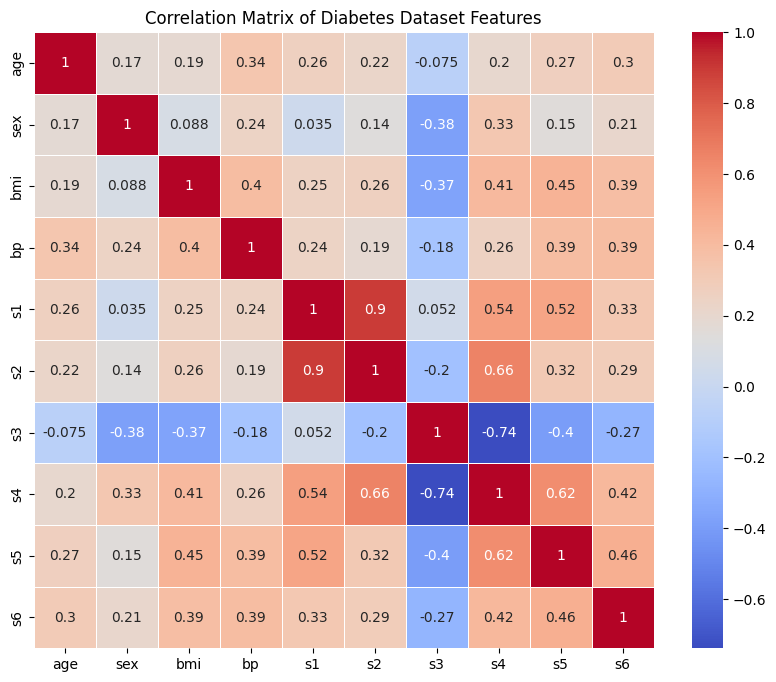

In [ ]:
# Convert to DataFrame for easier handling
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Compute the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create the heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.title('Correlation Matrix of Diabetes Dataset Features')
plt.show()

# Histogram

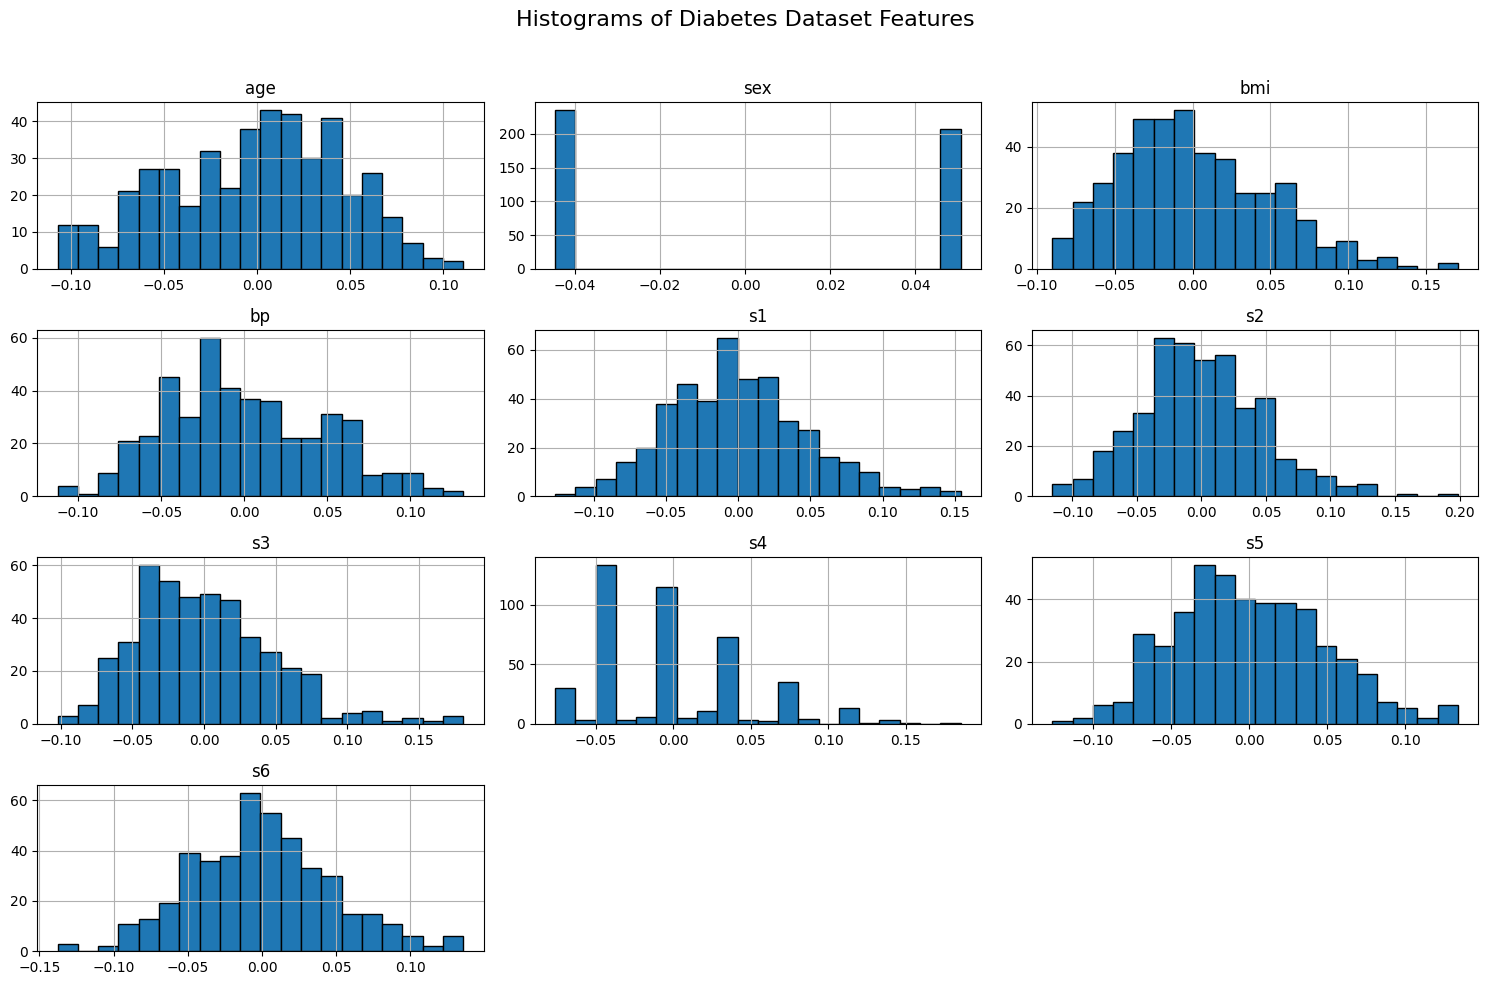

In [ ]:
# Plot histograms for each feature
df.hist(bins=20, figsize=(15, 10), edgecolor='black')

# Set overall title
plt.suptitle('Histograms of Diabetes Dataset Features', fontsize=16)

# Show the plots
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the suptitle
plt.show()

### Distribution Shape:

**Normal distribution:**   Features with a bell-shaped histogram are normally distributed, indicating the majority of values are around the mean.

**Skewness:**  A histogram skewed to the right (right tail longer) or left (left tail longer) indicates that the data is not symmetric, and many values fall either above or below the mean.

# Andrew Curves

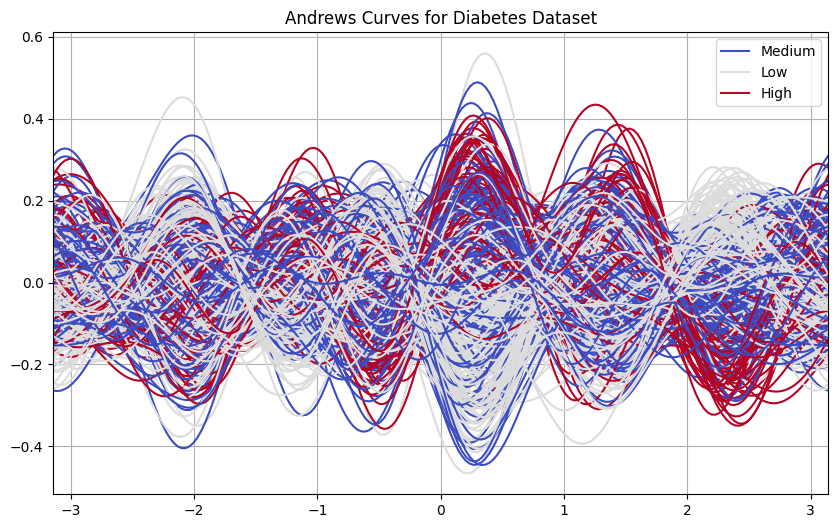

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import andrews_curves
from sklearn import datasets

# Load the Diabetes dataset
diabetes = datasets.load_diabetes()

# Convert to DataFrame for easier handling
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Add the target (disease progression) to the DataFrame
df['target'] = pd.cut(datasets.load_diabetes().target, bins=3, labels=['Low', 'Medium', 'High'])

# Plot Andrews Curves
plt.figure(figsize=(10, 6))
andrews_curves(df, 'target', colormap='coolwarm')

# Set plot title and show plot
plt.title('Andrews Curves for Diabetes Dataset')
plt.show()


There is no clear-cut separation between the different target groups (Low, Medium, High), indicating that the features in the diabetes dataset have overlapping values across the categories of disease progression.

There is a significant overlap between the curves of the three categories, indicating that the features do not completely separate the groups.

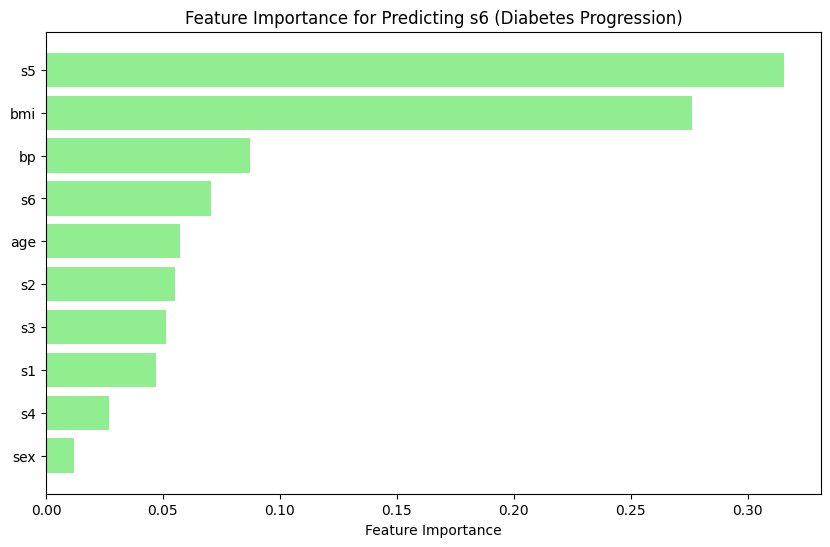

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Load the Diabetes dataset
diabetes = datasets.load_diabetes()

# Convert to DataFrame for easier handling
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Set the target to 's6' (Diabetes progression)
X = df  # Features (all features except s6)
y = diabetes.target  # Target (s6 is the disease progression score)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importance
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame to display the feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='lightgreen')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Predicting s6 (Diabetes Progression)')
plt.gca().invert_yaxis()  # Invert y-axis to show most important at the top
plt.show()

# Display feature importance
# feature_importance_df


**Top Features:**

1. s5 (serum measurement 5) is the most important feature for predicting diabetes progression, with the highest importance score.
2. bmi (body mass index) also plays a crucial role, coming in second with a high importance score.
3. bp (blood pressure) follows as the third most important feature.

If a feature has a very low importance score, it may have little to no effect on predicting the target variable. This insight can be useful for feature selection or dimensionality reduction in future modeling efforts.
Conversely, features with high importance scores play a key role in predicting diabetes progression and should be carefully analyzed in any model dealing with this problem.

# Bar Graph


<ipython-input-13-d190c3bbe8be>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_progression_per_age_bin = pd.DataFrame({'age_bin': age_bins, 'progression': progression}).groupby('age_bin').mean()


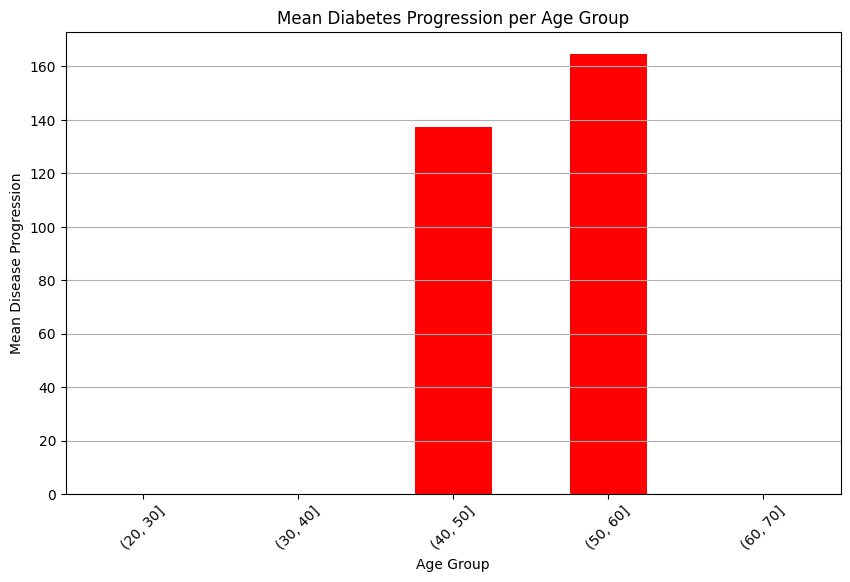

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
import pandas as pd

# Load the diabetes dataset
diabetes = load_diabetes()

# Extract Age (feature index 0) and target (disease progression)
age = diabetes.data[:, 0]  # Age data (normalized)
progression = diabetes.target  # Disease progression

# Rescale the age to a more interpretable range (e.g., 20-70 years)
age_rescaled = (age * 10) + 50

# Create bins for age groups
bins = [20, 30, 40, 50, 60, 70]
age_bins = pd.cut(age_rescaled, bins)

# Group data by age bins and calculate mean progression in each bin
mean_progression_per_age_bin = pd.DataFrame({'age_bin': age_bins, 'progression': progression}).groupby('age_bin').mean()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
mean_progression_per_age_bin['progression'].plot(kind='bar', color='red')
plt.title("Mean Diabetes Progression per Age Group")
plt.xlabel("Age Group")
plt.ylabel("Mean Disease Progression")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()


The bar graph shows the mean diabetes progression across different age groups. Each bar represents an age range (e.g., 20-30, 30-40), and the height of the bar indicates the average disease progression for that group. This helps us see how the progression of diabetes varies with age

# Pie Graph


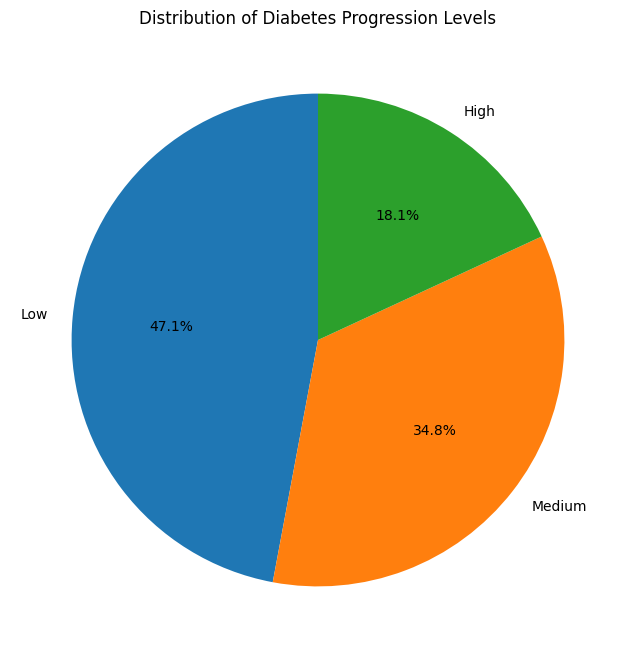

In [ ]:
# prompt: generate the pie graph from the dataset

# Assuming 'target' column has categorical values for which you want to create a pie chart
# You can replace 'target' with the column name that contains the data you want to visualize.
# Load the Diabetes dataset
diabetes = datasets.load_diabetes()

# Convert to DataFrame for easier handling
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Add the target (disease progression) to the DataFrame
df['target'] = pd.cut(datasets.load_diabetes().target, bins=3, labels=['Low', 'Medium', 'High'])
target_counts = df['target'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Diabetes Progression Levels')
plt.show()


Each slice of the pie shows the proportion (as a percentage) of each category in the 'target' column. Larger slices represent categories with a higher frequency, while smaller slices indicate less common categories.

# Line Graph

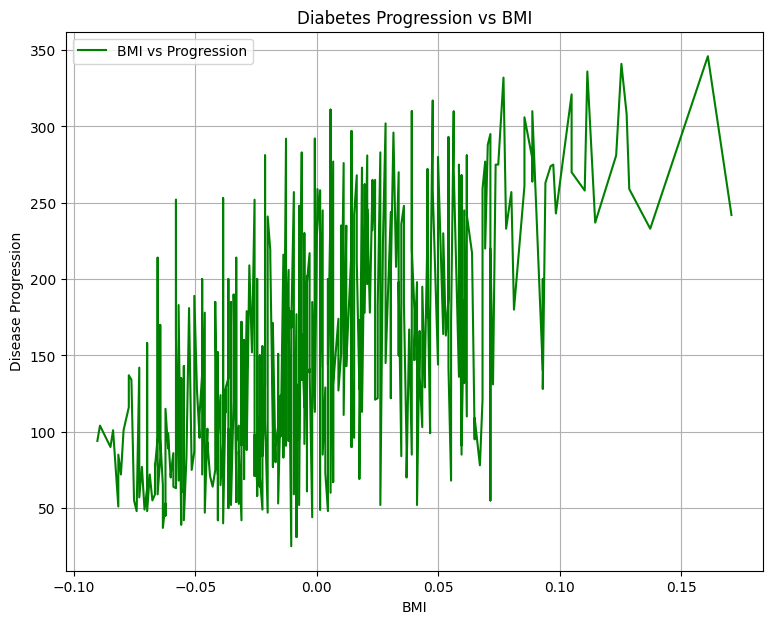

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
import numpy as np

# Load the diabetes dataset
diabetes = load_diabetes()

# Extract the BMI feature (index 2) and target (disease progression)
bmi = diabetes.data[:, 2]  # BMI data
progression = diabetes.target  # Disease progression

# Sort BMI and progression for a better line plot
sorted_indices = np.argsort(bmi)
bmi_sorted = bmi[sorted_indices]
progression_sorted = progression[sorted_indices]

# Plotting the line chart
plt.figure(figsize=(9, 7))
plt.plot(bmi_sorted, progression_sorted, label="BMI vs Progression", color="g")
plt.title("Diabetes Progression vs BMI")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.legend()
plt.grid(True)
plt.show()


The line chart shows the relationship between BMI (Body Mass Index) and diabetes progression. As BMI increases, the chart helps visualize how the disease progression changes. It gives us a general idea of how higher or lower BMI values are associated with the severity of diabetes, highlighting potential trends between these two variables.

The line graph indicates that BMI is an important factor in diabetes progression. Higher BMI is generally associated with a more severe progression of diabetes. However, the variability suggests that BMI alone doesn't entirely predict the progression, as other factors likely play a role in conjunction with BMI.

There is a lot of fluctuation in disease progression at lower BMI values, indicating that for people with low BMI, diabetes progression scores can vary widely.

At higher BMI values (above 0.05), the disease progression becomes more stable, and while there are still fluctuations, the progression scores are generally higher.

# Orgives

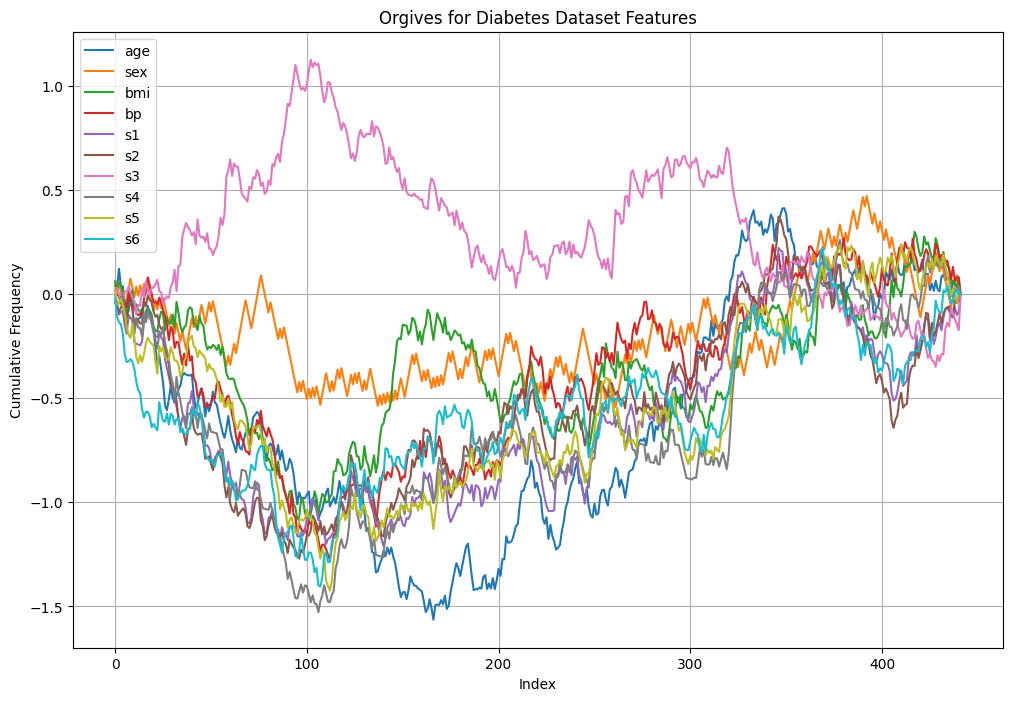

In [ ]:
# prompt: geneate the orgives from dibates dataset

# Import necessary library
import matplotlib.pyplot as plt

# Select only numerical features for cumulative frequency calculation
numerical_df = df.select_dtypes(include=['number'])

# Calculate cumulative frequency for numerical features
cumulative_frequencies = numerical_df.cumsum()

# Create the ogive plots
plt.figure(figsize=(12, 8))

for column in numerical_df.columns:
    plt.plot(numerical_df.index, cumulative_frequencies[column], label=column)

plt.xlabel('Index')
plt.ylabel('Cumulative Frequency')
plt.title('Orgives for Diabetes Dataset Features')
plt.legend()
plt.grid(True)
plt.show()

The ogive plot conveys the cumulative distribution of the numerical features in the diabetes dataset. It shows how the values of each feature accumulate as you move through the dataset.

The chart shows how data accumulates across the dataset. Sharp increases in the lines indicate a high frequency of larger values for a feature, while flatter or downward sections reflect lower or negative cumulative values.
Comparing these lines helps reveal which features have more distinct patterns (like sex or s2) versus those that follow similar trends (e.g., bmi, bp, s4, s6).

# Box Plot

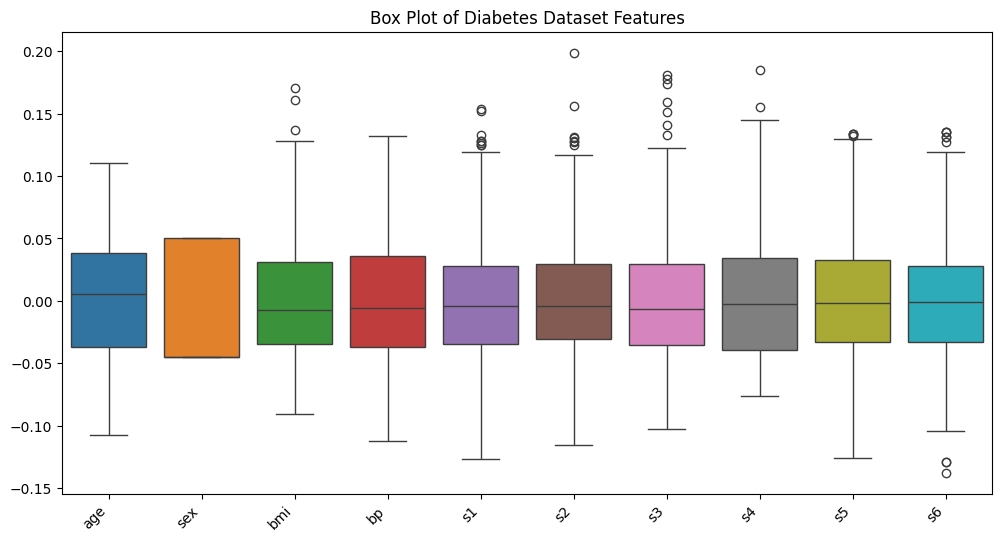

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Box Plot of Diabetes Dataset Features')
plt.xticks(rotation=45, ha='right')
plt.show()

-  Spread of features: You can easily compare how different features vary in terms of data spread (width of the boxes) and central tendency (location of the median line).
-Outliers: It highlights the presence of outliers in certain features, which might need special attention in analysis.

BMI, BP, and S1–S6: These features exhibit more variability. For example, S2, S3, and S4 have a large number of outliers above the upper whisker, indicating that several data points are higher than the majority of the dataset.